In [1]:
import os
import numpy as np

import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader, Subset

import lightning as L
import mlflow.pytorch
from mlflow import MlflowClient

from ptycho_torch.dset_loader_pt_mmap import PtychoDataset
from ptycho_torch.train import PtychoPINN

/root/miniconda3/envs/ptychopinn_ptychodus_pytorch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/root/miniconda3/envs/ptychopinn_ptychodus_pytorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/root/miniconda3/envs/ptychopinn_ptychodus_pytorch/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In this notebook we'll be testing the training of PtychoPINN in Pytorch.

First, we're going to generate a "fake" test dataset using data from /ptycho/datasets/Run1084_recon_postPC_

In [2]:
test = np.load('../ptycho/datasets/als128.npy.npz')

In [3]:
#List all keys from variable 
test.files

['diffraction',
 'probeGuess',
 'scan_index',
 'objectGuess',
 'xcoords_start',
 'ycoords_start',
 'xcoords',
 'ycoords']

In [6]:
import matplotlib.pyplot as plt

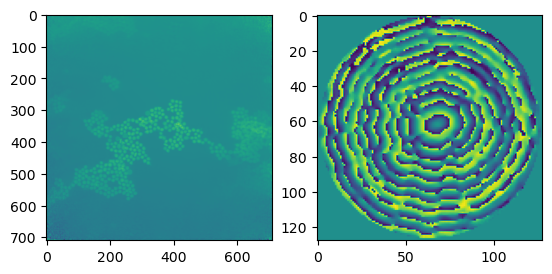

In [7]:
#Quickly plot test['objectGuess']**2 with matplotlib
plt.subplot(1,2,1)
plt.imshow(np.angle(test['objectGuess']))
plt.subplot(1,2,2)
plt.imshow(np.angle(test['probeGuess']))



In [10]:
test_object = torch.from_numpy(test['objectGuess'])

In [8]:
#Check real part of test_object
test_object.shape

torch.Size([710, 710])

Testing out datagen methods

In [62]:
import ptycho_torch.helper as hh
from ptycho_torch.config_params import Params
import importlib

importlib.reload(hh)

<module 'ptycho_torch.helper' from '/home/av_linux/PtychoPINN/ptycho_torch/helper.py'>

In [65]:
param_dict = {
    'nphotons': 1e5,
    'N': 128,
}

params = Params()
params.set_settings(param_dict)

In [45]:
test_probe = torch.from_numpy(test['probeGuess'])
test_patch_1 = test_object[300:300+128,200:200+128][None]
test_patch_2 = test_object[400:400+128,300:300+128][None]

test_patch = torch.cat((test_patch_1, test_patch_2), dim = 0)
test_patch.shape



torch.Size([2, 128, 128])

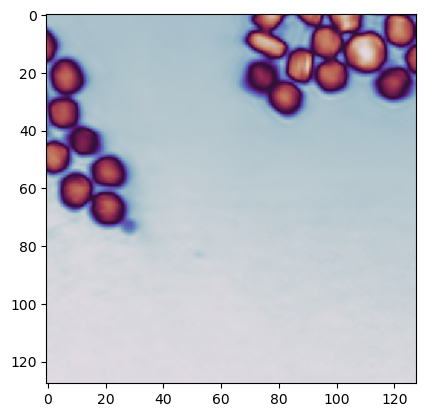

In [60]:
plt.imshow(test_patch[1].angle(), cmap = 'twilight')

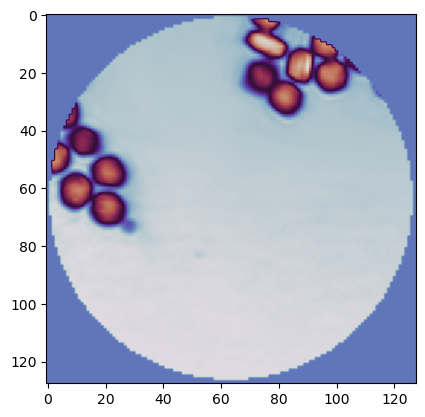

In [71]:
out, in_scaled = hh.illuminate_and_diffract(test_patch, test_probe)
plt.imshow(in_scaled[1].angle(), cmap = 'twilight')

In [70]:
test_probe[:3,:3]

tensor([[0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j]])